Análisis de datos en salud
============================

Unidad 6 - Parte práctica
-----------------------------------------------------


In [1]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 6
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad6


Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad6


## Datos de expresión de proteinas

El dataset `mice_protein_expression.csv` consta de los niveles de expresión de 77 proteínas/modificaciones de proteínas del cortex cerebral de ratones. Hay 38 ratones control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. En los experimentos se registraron 15 mediciones de cada proteína por muestra/ratón. Por lo tanto, para los ratones de control, hay 38x15, o 570 medidas, y para los ratones trisómicos, hay 34x15, o 510 medidas. El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medición puede considerarse como una muestra/ratón independiente.

Hay ocho clases de ratones, que se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender (contexto-shock) y otros no (shock-contexto) y para evaluar el efecto del fármaco memantina en la recuperación de la capacidad de aprender en ratones trisómicos, se han estimulado algunos ratones inyectados con la droga y otros no.

**Clases**:
- c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones)
- c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones)
- c-SC-s: ratones de control, no estimulados para aprender, inyectados con solución salina (9 ratones)
- c-SC-m: ratones control, no estimulados para aprender, inyectados con memantina (10 ratones)
- t-CS-s: ratones con trisomía, estimulados para aprender, inyectados con solución salina (7 ratones)
- t-CS-m: ratones con trisomía, estimulados para aprender, inyectados con memantina (9 ratones)
- t-SC-s: ratones con trisomía, no estimulados para aprender, inyectados con solución salina (9 ratones)
- t-SC-m: ratones con trisomía, no estimulados para aprender, inyectados con memantina (9 ratones)


**Columnas del dataset**:

Información de atributos
- [1] ID del ratón
- [2:78] Valores de los niveles de expresión de 77 proteínas.
- [79] Genotipo: control (c) o trisomía (t)
- [80] Tipo de tratamiento: memantina (m) o solución salina (s)
- [81] Comportamiento: shock-contexto (CS) o shock-contexto (SC)
- [82] Clase: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-metro

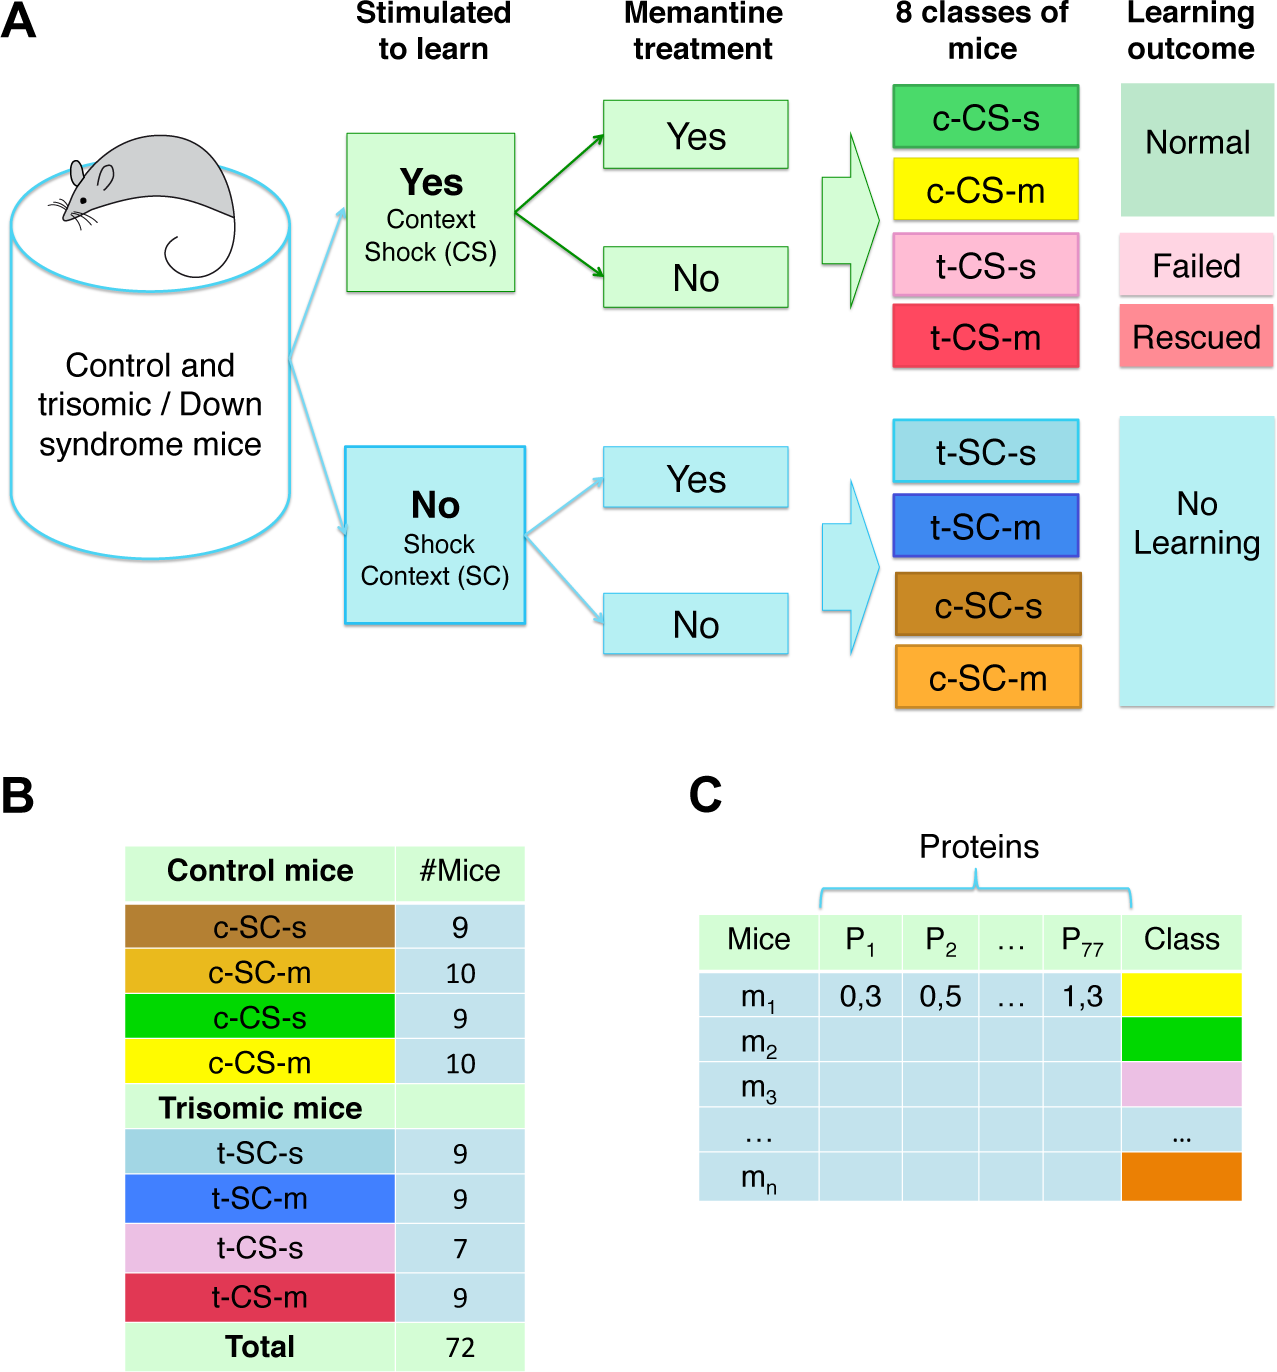

In [2]:
from IPython import display
display.Image("img/protein_exp_mice.png", width=700)

### Ejercicio 1

a) Primero de todo vamos a explorar un poco el dataset. Carga los datos y muestra su tamaño y el nombre de las columnas. Muestra también por pantalla las 5 primeras filas.

b) ¿Hay filas duplicadas en el dataset?

c) Hay algún valor perdido (*missing*) (NaN) en el dataset? Si tenemos columnas con más del 5% de muestras con NaNs, crea un nuevo df sin estas. Para las otras columnas (<=5% de NaNs), puedes eliminar las filas con NaNs.

In [3]:
#a)

# Importamos las librerías necesarias para esta práctica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# Cargamos el archivo csv en un DataFrame
prot_df = pd.read_csv("data/mice_protein_expression.csv", sep=",")

# Mostramos el tamaño del df
print("Tamaño df:\n", prot_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", prot_df.columns)

# Visualizamos las 5 primeras filas con el comando head()
prot_df.head()

Tamaño df:
 (1080, 82)
Columnas del df:
 Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', '

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [4]:
# Mostramos el tipo de las variables
# Tenemos algunos NaNs
print(prot_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [5]:
#b) Gestión de duplicados y NaNs

#Miramos si hay duplicados
print("Filas duplicadas:", prot_df.duplicated().sum())

# No hay filas duplicadas!


Filas duplicadas: 0


In [6]:
# No hay valores nulos en el df
prot_df.isna().sum()

,0
MouseID,0
DYRK1A_N,3
ITSN1_N,3
BDNF_N,3
NR1_N,3
...,...
CaNA_N,0
Genotype,0
Treatment,0
Behavior,0


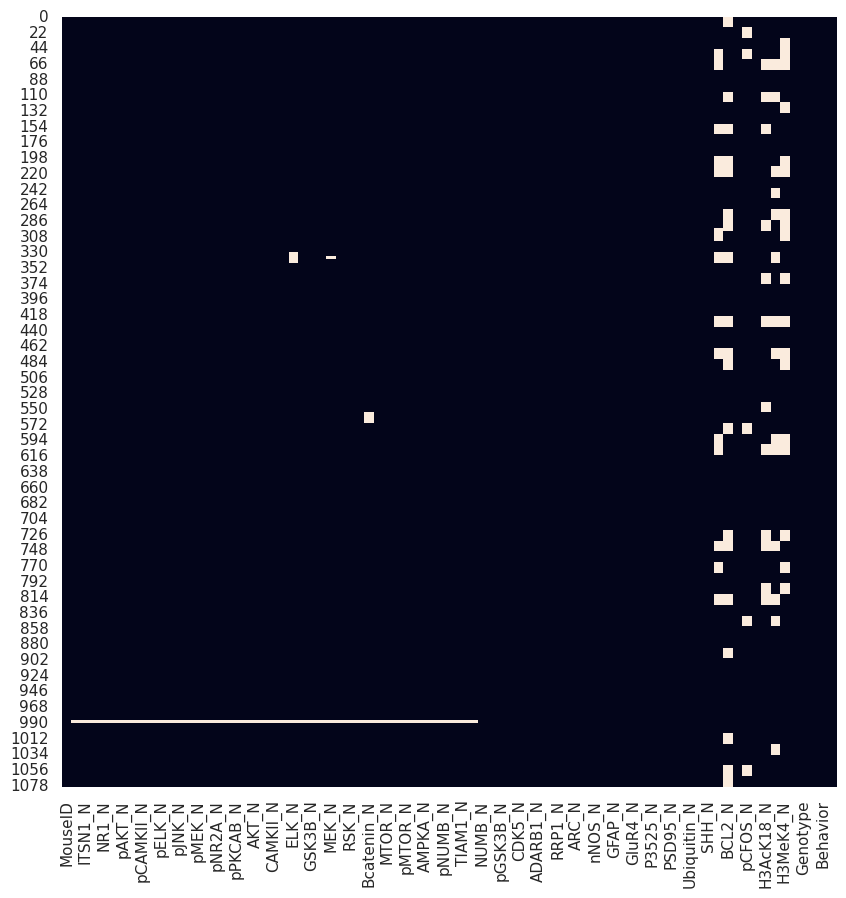

In [7]:
# Mostramos donde hay NaNs de manera visual
plt.figure(figsize=(10,10))
sns.heatmap(prot_df.isna(),cbar=False)
plt.show()

In [8]:
# Mostramos el porcentaje de NaNs por columna
np.round(prot_df.isna().sum()/prot_df.shape[0]*100,1).sort_values(ascending=False).head(20)

,0
BCL2_N,26.4
H3MeK4_N,25.0
BAD_N,19.7
EGR1_N,19.4
H3AcK18_N,16.7
pCFOS_N,6.9
Bcatenin_N,1.7
ELK_N,1.7
MEK_N,0.6
pCAMKII_N,0.3


In [9]:
# Vemos que tenemos 6 columnas con más de 5% de NaNs
cols_nans = ["BCL2_N", "H3MeK4_N", "BAD_N", "EGR1_N", "H3AcK18_N", "pCFOS_N"]

# Creamos un nuevo df sin estas columnas
prot_clean_df = prot_df.drop(columns=cols_nans)

# Eliminamos las filas con NaNs
prot_clean_df = prot_clean_df.dropna()

# Mostramos el tamaño del nuevo df
prot_clean_df.shape

(1047, 76)

### Ejercicio 2

En este dataset tenemos distintas clases y categorías, vamos a explorarlas en detalle:

a) Muestra por pantalla el número de ratones en función del genotipo, el tipo de tratamiento, el comportamiento y las clases.

b) Responde las siguientes preguntas:

- Si queremos hacer un modelo para identificar diferencias de expresión genética entre ratones controles y ratones con síndrome de Down, ¿qué variable tenemos que usar como *target*?

- Si queremos buscar diferencias entre ratones que han recibido tratamiento (fármaco), ¿en qué variable nos tenemos que centrar?

- ¿Tenemos suficientes muestras para hacer un análisis estadístico o de aprendizaje automático usando las 8 clases de la variable *class*? Razona tu respuesta.

Proporción de ratones según el genotipo:
Genotype
Control    0.515759
Ts65Dn     0.484241
Name: proportion, dtype: float64 



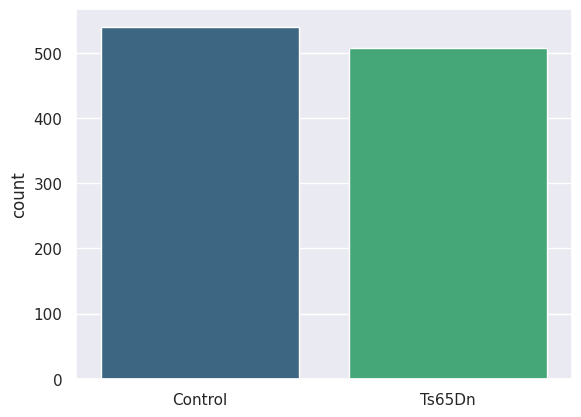

In [10]:
# a)

# Estudiamos la variable Genotype
print("Proporción de ratones según el genotipo:")
print(prot_clean_df['Genotype'].value_counts(normalize=True),"\n")

# Mostramos la distribución de forma visual
# Creamos un gráfico de barras
sns.barplot(x = prot_clean_df['Genotype'].unique(), y = prot_clean_df['Genotype'].value_counts(), palette= 'viridis')
plt.show()

# ¡Tenemos un dataset balanceado!

Proporción de ratones según el tratamiento:
Treatment
Memantine    0.544413
Saline       0.455587
Name: proportion, dtype: float64 



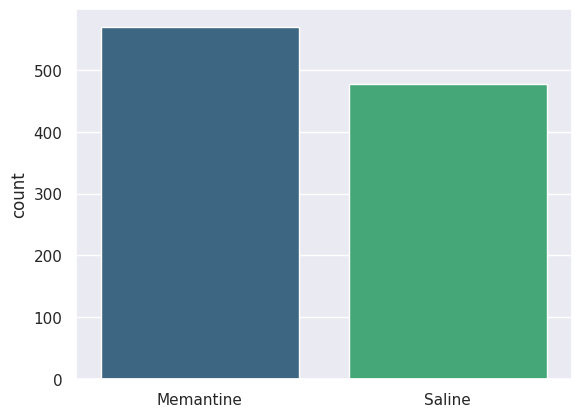

In [11]:
# Estudiamos la variable Treatment
print("Proporción de ratones según el tratamiento:")
print(prot_clean_df['Treatment'].value_counts(normalize=True),"\n")

# Mostramos la distribución de forma visual
# Creamos un gráfico de barras
sns.barplot(x = prot_clean_df['Treatment'].unique(), y = prot_clean_df['Treatment'].value_counts(), palette= 'viridis')
plt.show()

# ¡Tenemos un dataset balanceado!

Proporción de ratones según el comportamiento:
Behavior
S/C    0.512894
C/S    0.487106
Name: proportion, dtype: float64 



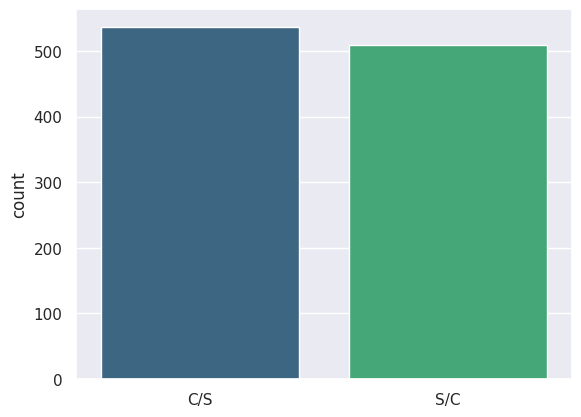

In [12]:
# Estudiamos la variable Behavior
print("Proporción de ratones según el comportamiento:")
print(prot_clean_df['Behavior'].value_counts(normalize=True),"\n")

# Mostramos la distribución de forma visual
# Creamos un gráfico de barras
sns.barplot(x = prot_clean_df['Behavior'].unique(), y = prot_clean_df['Behavior'].value_counts(), palette= 'viridis')
plt.show()

# ¡Tenemos un dataset balanceado!

Proporción de ratones según al clase:
class
c-CS-m    0.143266
c-SC-m    0.143266
t-SC-m    0.128940
t-CS-m    0.128940
t-SC-s    0.126074
c-CS-s    0.114613
c-SC-s    0.114613
t-CS-s    0.100287
Name: proportion, dtype: float64 



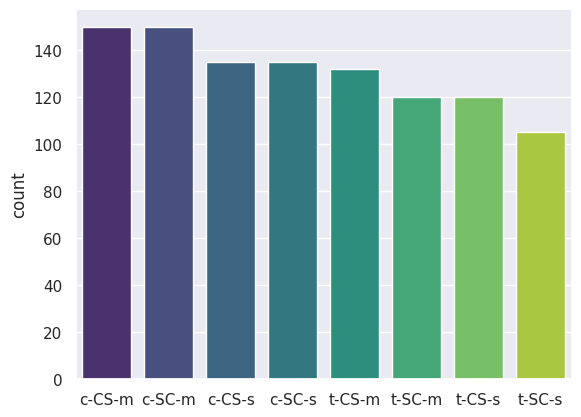

In [13]:
# Estudiamos la variable class
print("Proporción de ratones según al clase:")
print(prot_clean_df['class'].value_counts(normalize=True),"\n")

# Mostramos la distribución de forma visual
# Creamos un gráfico de barras
sns.barplot(x = prot_clean_df['class'].unique(), y = prot_clean_df['class'].value_counts(), palette= 'viridis')
plt.show()

# ¡Los datos están bastante balanceados!

**Respuesta b**

- Para identificar diferencias de expresión genética entre ratones controles y ratones con síndrome de Down tenemos que usar la variable **Genotype**, ya que identifica con una "c" a los controles y con una "t" a los ratones con trisomía.

- Para buscar diferencias  entre ratones que han recibido tratamiento tenemos que usar la variable **Treatment type**. Los ratones que han recibido el fármaco tendrán el valor memantine (m), y los que han recibido la solución salina, saline (s).

- Esta pregunta se tiene que poner en el contexto biomédico. En general, si tenemos solo 100 muestras por grupo podríamos decir que es un dataset demasiado pequeño para sacar resultados estadísticamente relevantes. Sin embargo, en el ámbito de la investigación biomédica, el número de muestras acostumbra a ser limitado y los conjuntos de datos no son muy grandes. Por eso, un dataset con 100 muestras por grupo en este contexto se considera aceptable en la comunidad científica.



### Ejercicio 3

A continuación, vamos a preparar los datos para poderlos usar en modelos predictivos.

a) Codifica las variables categóricas como numéricas. Usa una estrategia de Label Encoding (es decir, cada categoría de la variable tiene que ser un número).

b) Estandariza las variables numéricas.

c) Muestra una matriz de correlación con todas las variables. ¿Qué variables de expresión de proteinas están más relacionadas con el genotipo?

In [14]:
# Vamos a crear una función para codificar las variables categóricas

def encoding(df):
  # Definimos como queremos codificar los valores
  code = {
    'Control':0,
    'Ts65Dn':1,
    'Memantine':1,
    'Saline':0,
    'C/S':1,
    'S/C':0,
    'c-CS-m':0,
    'c-SC-m':1,
    'c-CS-s':2,
    'c-SC-s':3,
    't-CS-m':4,
    't-SC-m':5,
    't-CS-s':6,
    't-SC-s':7,
          }
  # Aplicamos el encoding a las columnas categóricas
  for col in df.select_dtypes('object'):
      df.loc[:,col]=df[col].map(code)

  return df

In [15]:
# Creamos un nuevo df sin la columna MouseID (no la vamos a usar)
prot_preproc_df = prot_clean_df.drop(columns='MouseID')

# Aplicamos la función para codificar las variables categóricas
prot_preproc_df = encoding(prot_preproc_df)

# Cargamos la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Nos quedamos con las variables numéricas (df original)
cols_num = list(prot_clean_df.select_dtypes('float64').columns)

# Aplicamos el escalado estándar solo a las columnas numéricas
prot_preproc_df[cols_num] = scaler.fit_transform(prot_preproc_df[cols_num])

# Comprobamos que la estandarización es correcta
prot_preproc_df[cols_num].describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
count,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,...,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03
mean,-1.900210e-16,2.035939e-16,9.908237e-16,4.071878e-17,1.764481e-16,-9.161726e-17,-1.764481e-16,1.085834e-16,4.071878e-17,2.714585e-16,...,-1.357293e-16,5.089848e-16,1.764481e-16,2.714585e-17,-1.085834e-16,-1.560887e-16,-2.884247e-16,-3.461096e-16,-2.578856e-16,4.750524e-17
std,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,...,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00
min,-1.121010e+00,-1.476953e+00,-4.092785e+00,-2.748732e+00,-2.227855e+00,-2.788538e+00,-2.872312e+00,-1.687633e+00,-3.045075e+00,-2.135674e+00,...,-2.766994e+00,-2.814676e+00,-3.588651e+00,-2.413129e+00,-2.828079e+00,-2.841777e+00,-2.409945e+00,-3.759996e+00,-2.794859e+00,-2.342288e+00
25%,-5.491686e-01,-5.723436e-01,-6.407533e-01,-6.929982e-01,-7.333619e-01,-6.837850e-01,-6.724284e-01,-8.335777e-01,-6.725151e-01,-4.733981e-01,...,-7.022989e-01,-6.776963e-01,-6.274068e-01,-7.099182e-01,-7.106267e-01,-5.905630e-01,-7.000625e-01,-7.665684e-01,-7.176107e-01,-8.158766e-01
50%,-2.434071e-01,-2.066966e-01,-6.470556e-02,-9.931446e-03,-1.192107e-01,-6.392604e-02,3.522419e-03,-1.532833e-01,-5.468144e-02,-1.596425e-01,...,-2.489623e-02,-1.031652e-01,2.842795e-02,-9.910940e-02,-2.476478e-02,9.700746e-04,-1.034729e-01,1.194922e-02,2.618743e-02,-6.558897e-02
75%,2.425002e-01,3.231304e-01,5.706879e-01,6.672424e-01,6.089184e-01,5.901675e-01,5.761534e-01,7.023564e-01,6.692246e-01,2.789344e-01,...,6.749986e-01,6.708898e-01,7.420681e-01,5.620362e-01,7.058876e-01,7.271262e-01,5.139897e-01,7.293314e-01,6.801203e-01,7.916011e-01
max,8.292349e+00,7.815919e+00,3.610676e+00,4.169803e+00,4.945458e+00,7.507910e+00,5.146032e+00,3.048926e+00,2.841102e+00,9.944032e+00,...,5.111563e+00,4.147045e+00,2.507937e+00,4.010557e+00,3.779939e+00,3.758037e+00,4.507376e+00,2.587250e+00,4.705885e+00,2.470203e+00


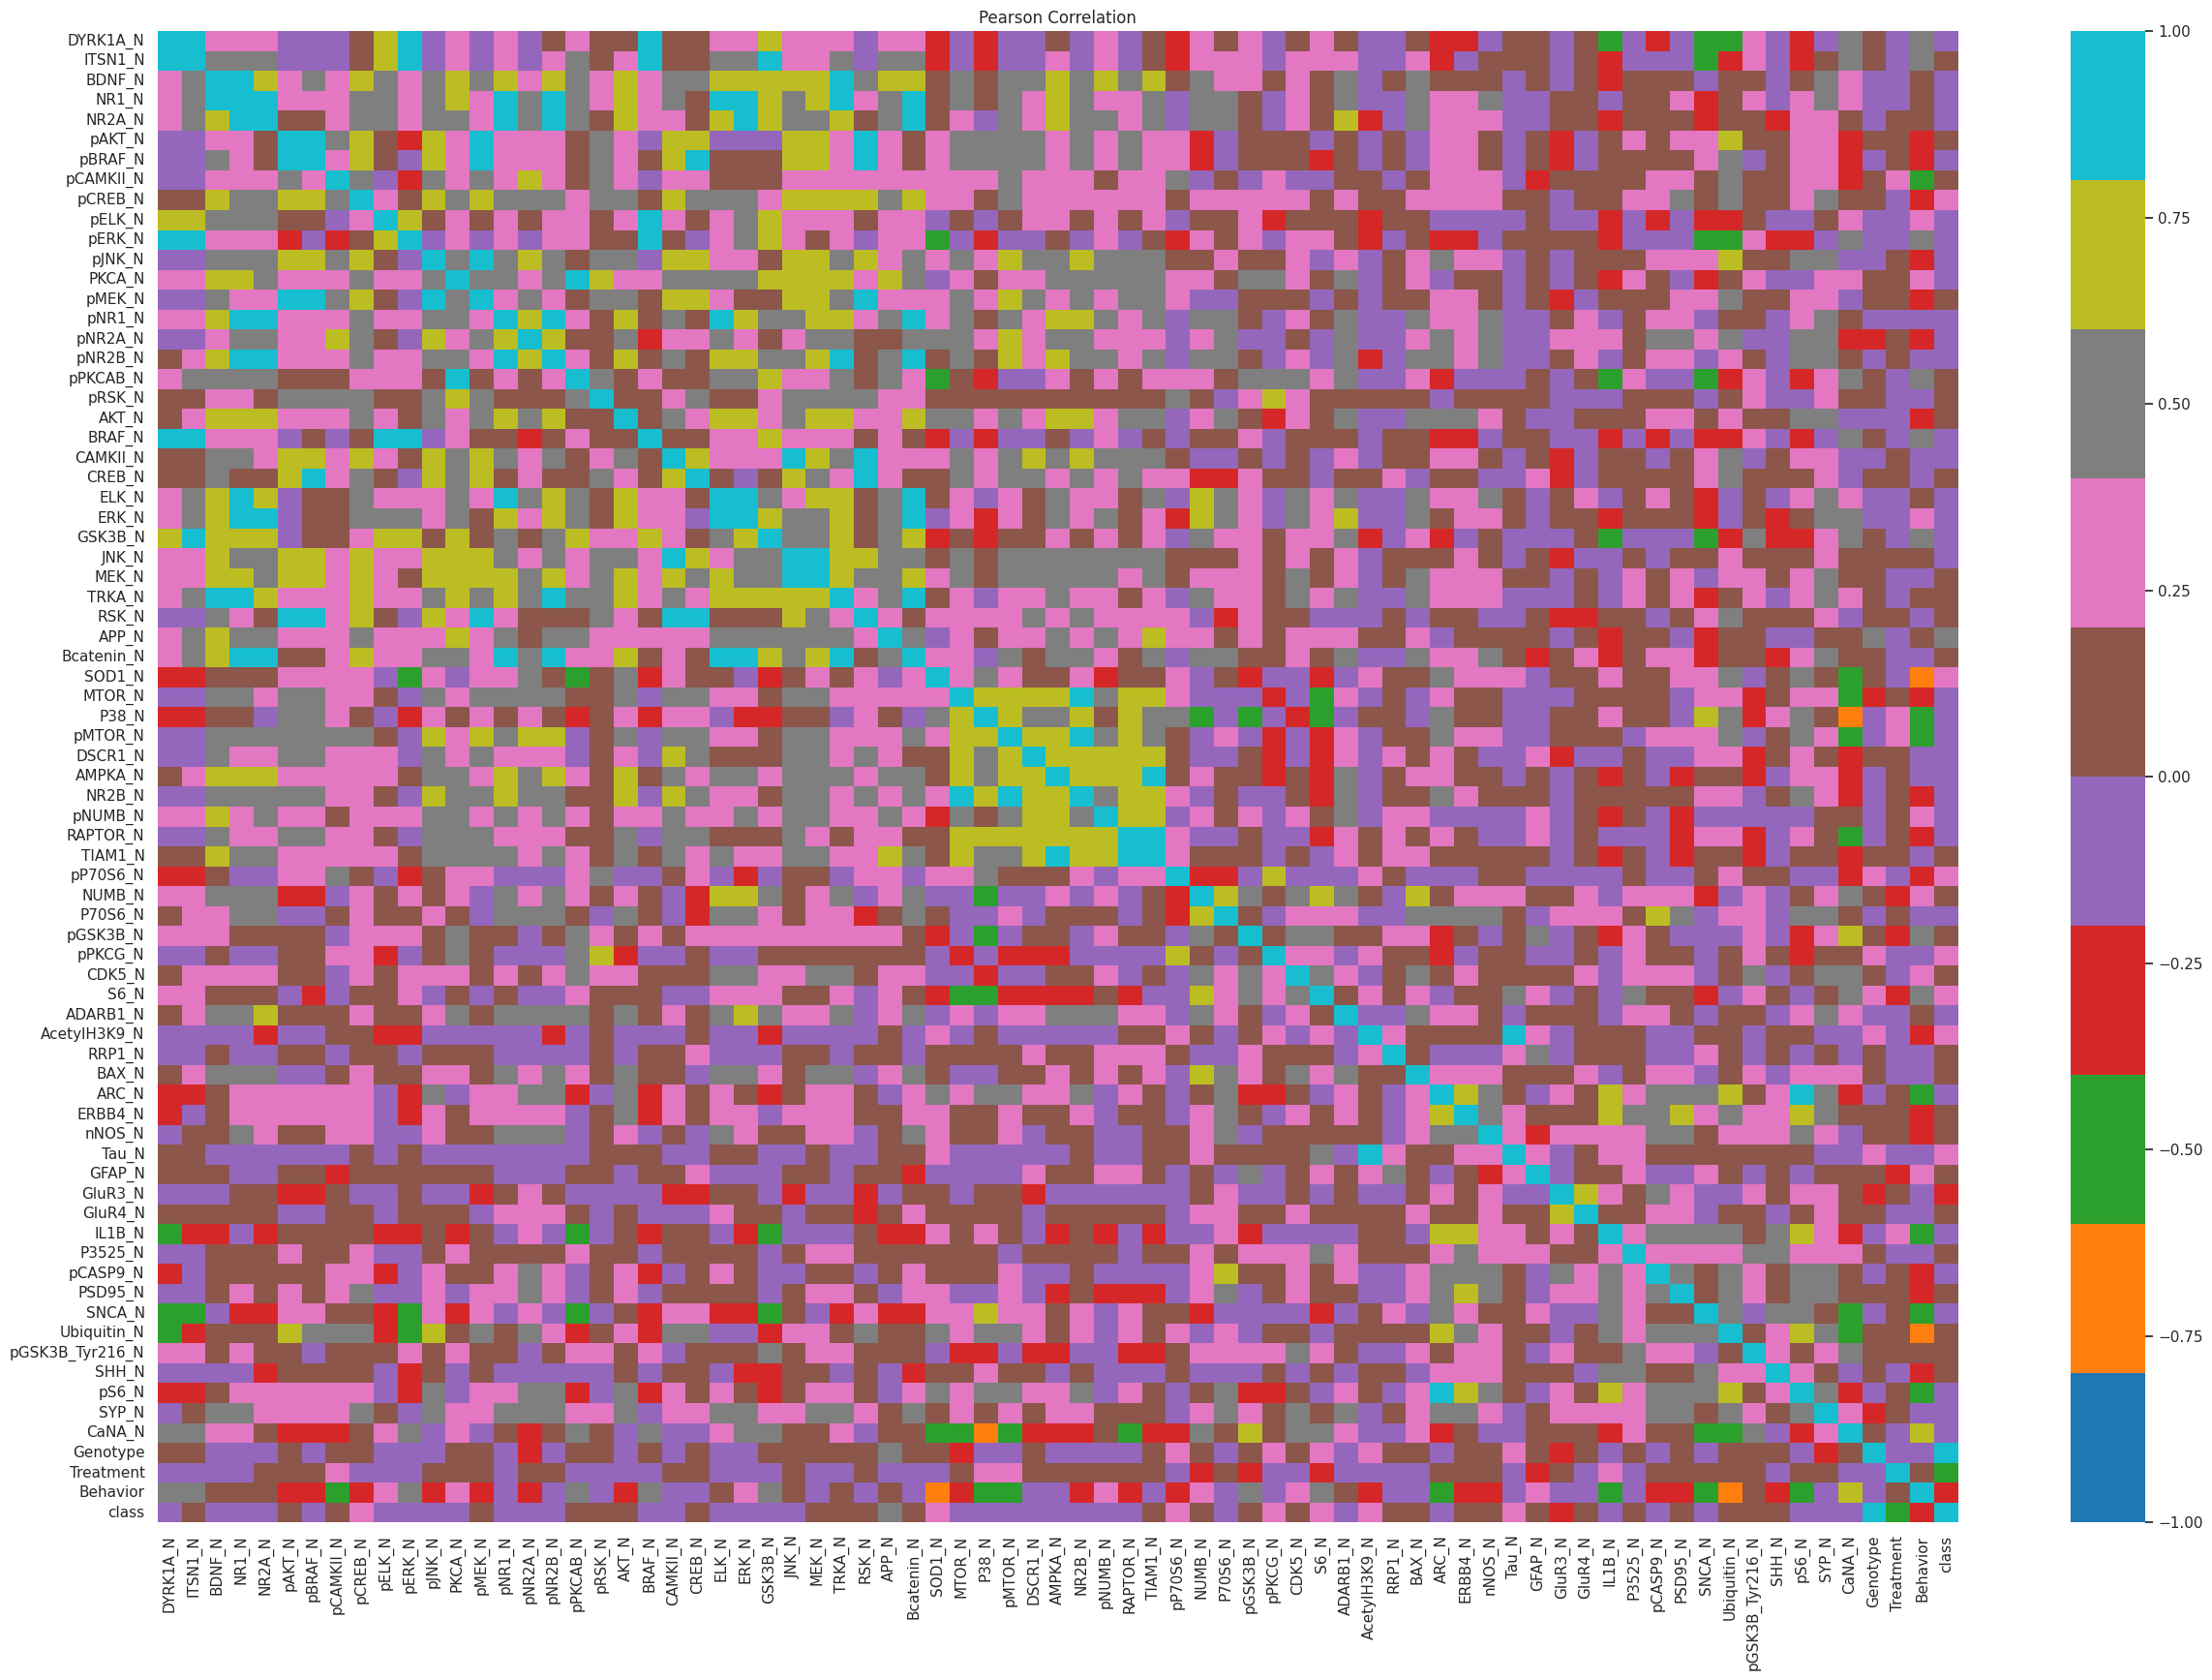

In [16]:
# Mostramos la matriz de correlación
corr = prot_preproc_df.corr(method='pearson')

fig = plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap='tab10', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

In [17]:
corr['Genotype'].abs().sort_values(ascending=False).head(10)

# Las variables más relacionadas con el genotipo son
# APP_N, S6_N, pPKCG_N y Tau_N

,Genotype
Genotype,1.000000
class,0.874952
APP_N,0.532322
S6_N,0.343676
pPKCG_N,0.307850
Tau_N,0.279281
AcetylH3K9_N,0.254965
GluR3_N,0.245530
pNR2A_N,0.245312
SYP_N,0.219569


### Ejercicio 4

a) Crea un modelo de aprendizaje automático para clasificar los ratones según su **Genotipo**. Muestra las métricas del modelo y las variables más importantes. Se puede identificar correctamente su genotipo según la expresión de proteínas? Y su clase? Razona tu respuesta.

b) Repite el procedimiento del apartado a), pero para predecir la **Clase**. **Opcional**

Accuracy train:  1.0
Accuracy test:  0.9968253968253968
Accuray 0.9990448901623686


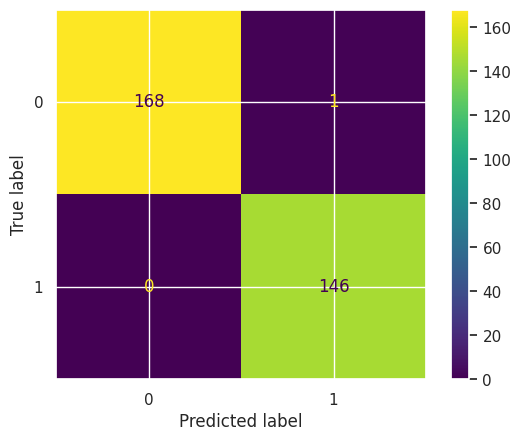

In [18]:
# a) Modelo para identificar el genotipo

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# 1) Separar datos en train (70%) y test (30%)

# Creamos un modelo de clasificación para predecir
# el genotipo del ratón

# Separamos los datos en X (características) e y (Genotype)
# Tenemos que eliminar las otras categorías ya que están relacionadas

X = prot_preproc_df.drop(columns=['Genotype', 'Treatment', 'Behavior', 'class']).values
y = prot_preproc_df['Genotype'].values.reshape(-1,1).astype('int')

# Separamos los datos en conjunto de train y test
# Usaremos un test size de 0.3
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=308)

#2) Modelo de clasificación (Random Forest)

# Usamos random forest
model = RandomForestClassifier()

# Aplicamos la LR a nuestro subset de entrenamiento
model.fit(x_train,y_train)

# Predecimos en el dataset de test
y_pred = model.predict(x_test)

# Revisamos la accuracy

# Accuracy en el subset de train
print("Accuracy train: ",accuracy_score(y_train,model.predict(x_train)))

# Accuracy en el subset de test
print("Accuracy test: ",accuracy_score(y_test,y_pred))

# Accuracy en todo el conjunto
print("Accuray", accuracy_score(y,model.predict(X)))

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# La visualizamos con la función ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

Text(0.5, 1.0, 'Importancia de las variables del modelo')

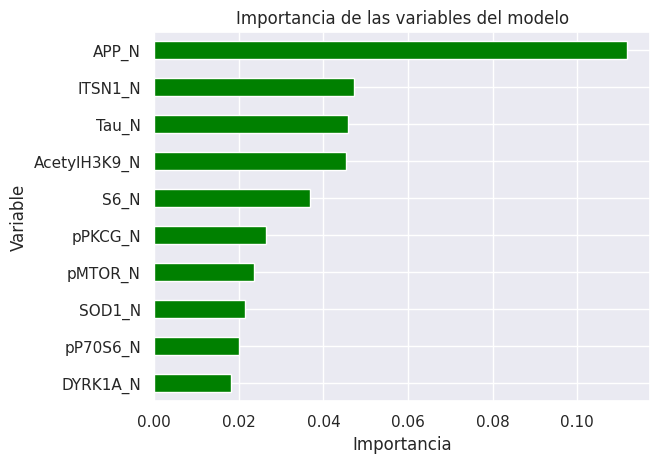

In [19]:
# Especificamos las variables del modelo
cols_modelo = prot_preproc_df.drop(columns=['Genotype', 'Treatment', 'Behavior', 'class']).columns
# Calculamos la importancia de las variables
global_importances = pd.Series(model.feature_importances_, index=cols_modelo)
# Las ordenamos de mayor a menor para quedarnos con las 10 primeras
global_importances.sort_values(ascending=False, inplace=True)
global_importances_top10 = global_importances.head(10).sort_values(ascending=True)

# Mostramos un gráfico de barras con el resultado
global_importances_top10.plot.barh(color='green')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las variables del modelo")

Accuracy train:  1.0
Accuracy test:  0.9873015873015873


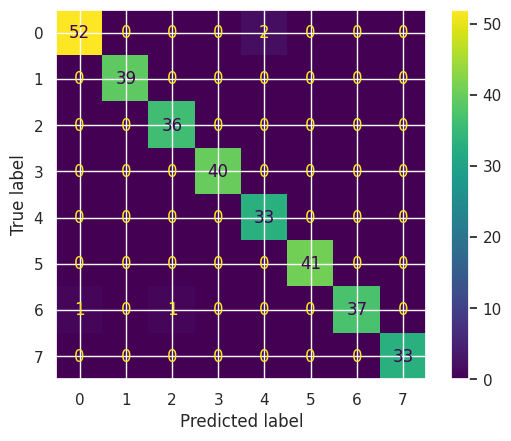

In [20]:
# b) Modelo para identificar la clase

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# 1) Separar datos en train (70%) y test (30%)

# Creamos un modelo de clasificación para predecir
# el genotipo del ratón

# Separamos los datos en X (características) e y (Genotype)
# Tenemos que eliminar las otras categorías ya que están relacionadas

X2 = prot_preproc_df.drop(columns=['Genotype', 'Treatment', 'Behavior', 'class']).values
y2 = prot_preproc_df['class'].values.reshape(-1,1).astype('int')

# Separamos los datos en conjunto de train y test
# Usaremos un test size de 0.3
x_train2, x_test2, y_train2, y_test2=train_test_split(X2,y2, test_size=0.3,random_state=308)

#2) Modelo de clasificación (Random Forest)

# Usamos random forest
model2 = RandomForestClassifier()

# Aplicamos la LR a nuestro subset de entrenamiento
model2.fit(x_train2,y_train2)

# Predecimos en el dataset de test
y_pred2 = model2.predict(x_test2)

# Revisamos la accuracy

# Accuracy en el subset de train
print("Accuracy train: ",accuracy_score(y_train2,model2.predict(x_train2)))

# Accuracy en el subset de test
print("Accuracy test: ",accuracy_score(y_test2,y_pred2))

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test2, y_pred2, labels=model2.classes_)

# La visualizamos con la función ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model2.classes_)
disp.plot()
plt.show()

Text(0.5, 1.0, 'Importancia de las variables del modelo')

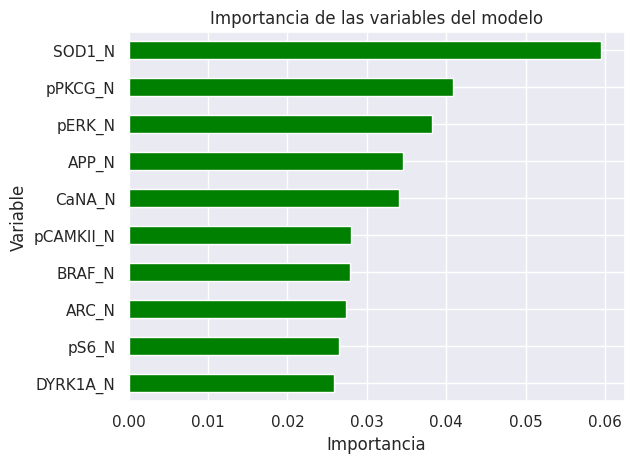

In [21]:
# Especificamos las variables del modelo
cols_modelo = prot_preproc_df.drop(columns=['Genotype', 'Treatment', 'Behavior', 'class']).columns
# Calculamos la importancia de las variables
global_importances2 = pd.Series(model2.feature_importances_, index=cols_modelo)
# Las ordenamos de mayor a menor para quedarnos con las 10 primeras
global_importances2.sort_values(ascending=False, inplace=True)
global_importances2_top10 = global_importances2.head(10).sort_values(ascending=True)

# Mostramos un gráfico de barras con el resultado
global_importances2_top10.plot.barh(color='green')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las variables del modelo")